In [1]:
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Another utility for the legend
from matplotlib.cm import ScalarMappable


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/trentino_temperature.csv")


In [3]:
data["date"] = pd.to_datetime(data["date"])

### A layout of heatmaps

In [4]:
MIN_TEMP = data["temp"].min()
MAX_TEMP = data["temp"].max()

In [5]:
def single_plot(data, month, year, ax):
    data = data[(data["date"].dt.year == year) & (data["date"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = data["temp"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)

Text(0.5, 0.98, 'Hourly temperatures')

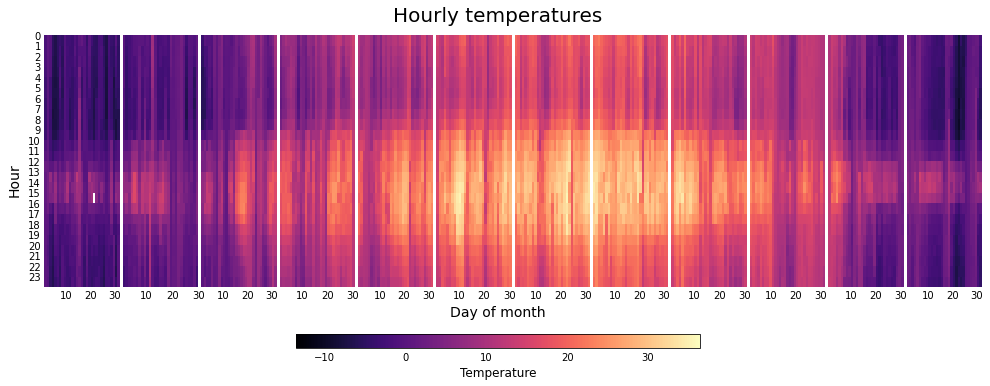

In [60]:
# create a figure with 2 rows and 12 columns and loop through each month

fig, axes = plt.subplots(1, 12, figsize=(14, 5), sharey=True)

for i, year in enumerate([2004]):
    for j, month in enumerate(range(1, 13)):
        #print(f'j: {j}, month: {month}')
        single_plot(data, month, year, axes[j])

# Adjust margin and space between subplots
# Extra space is on the left to add a label
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

# Add legend 
# some room for the legend in the bottom
fig.subplots_adjust(bottom=0.2)

# Create a new axis to contain the color bar
# Values are: (x coordinate of left border, y coordinate for bottom border, width, height)
cbar_ax = fig.add_axes([0.3, 0.03, 0.4, 0.04])

# Create a normalizer that goes from minimum to maximum temperature
norm = mc.Normalize(MIN_TEMP, MAX_TEMP)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal")

# Remove tick marks and set label
cb.ax.xaxis.set_tick_params(size=0)
cb.set_label("Temperature", size=12)


# add some figure labels and title
fig.text(0.5, 0.13, "Day of month", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour', ha="center", va="center", rotation="vertical", fontsize=14)
fig.suptitle("Hourly temperatures", fontsize=20, y=0.98)

In [86]:
# save the plot
# fig.set_facecolor("white")
# fig.savefig("plot.png", dpi=300)